In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

#### linear regression with one variable

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('ex1data1.txt')

In [5]:
df

,area,price
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [6]:
X=np.array(df['area'])
Y=np.array(df.price)

In [7]:
m=np.size(X)
m

97

In [8]:
ones=np.ones((m,1))

In [9]:
X=X[:,np.newaxis]
Y=Y[:,np.newaxis]
X=np.hstack((ones,X))
X[0:5,:]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

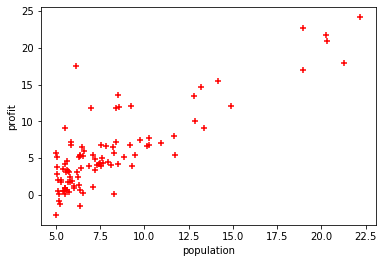

In [10]:
plt.scatter(X[:,1],Y,marker='+',color='red',label='given data')
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

In [11]:
theta=np.array([[0],[0]])

In [12]:
def cost(theta,X,Y,m):
    hypothesis=np.matmul(X,theta)
    difference=hypothesis-Y
    difference_square=np.square(difference)
    sum=np.sum(difference_square)
    sum=sum/(2*m)
    return sum

In [13]:
cost(theta,X,Y,m)

32.072733877455676

In [14]:
iterations=1500
alpha=0.01
    

In [15]:
cost([[-1],[2]],X,Y,m)

54.24245508201238

In [16]:
def gradient_descent(X,Y,theta,alpha,num_iters):
    j_history=np.zeros((num_iters,1))
    m=np.size(Y)
    for  i in range(num_iters):
        hypothesis=np.matmul(X,theta)
        j_history[i]=cost(theta,X,Y,m)
        
        difference=hypothesis-Y
        theta=theta-(((alpha*1.0)/m)*np.matmul(X.T,difference))
    
    return theta,j_history
        

In [17]:
x=gradient_descent(X,Y,theta,alpha,1500)

In [18]:
theta=x[0]
theta

array([[-3.63029144],
       [ 1.16636235]])

same as given expected in the programming assignment 

In [19]:
predict1=np.matmul(theta.T,np.array([[1],[3.5]]))
predict2=np.matmul(theta.T,np.array([[1],[7]]))

In [20]:
print(predict1*10000)
print(predict2*10000)

[[4519.7678677]]
[[45342.45012945]]


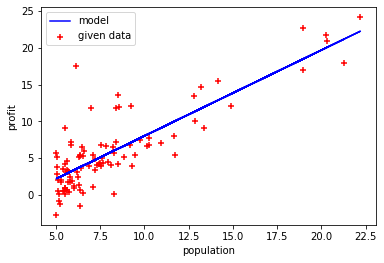

In [21]:
from matplotlib import pyplot as plt
plt.scatter(X[:,1],Y,marker='+',color='red',label='given data')
plt.xlabel('population')
plt.ylabel('profit')
plt.plot(X[:,1],np.matmul((X),theta),color='blue',label='model')
plt.legend()
plt.show()

In [22]:
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)

In [23]:
j_val=np.zeros((np.size(theta0_vals),np.size(theta1_vals)))

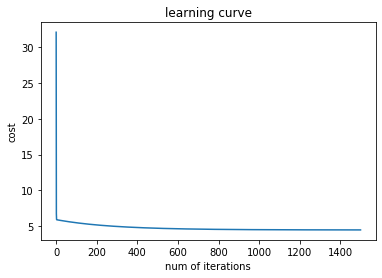

In [24]:
plt.plot(range(iterations),x[1])
plt.xlabel('num of iterations')
plt.ylabel('cost')
plt.title('learning curve')

plt.show()

In [25]:
data=pd.read_csv('ex1data2.txt',sep=',',header=None)

In [26]:
X=data.iloc[:,0:2]
Y=data.iloc[:,2]

In [27]:
m=len(Y)

In [28]:
mean=np.mean(X)
std=np.std(X)
X=(X-mean)/std


In [29]:
ones=np.ones((m,1))

In [30]:
X=np.hstack((ones,X))

In [31]:
Y=Y[:,np.newaxis]

In [32]:
iterations=400
theta=np.zeros((3,1))
alpha=0.01

In [33]:
x=gradient_descent(X,Y,theta,alpha,iterations)

In [34]:
cost(theta,X,Y,m)

65591548106.45744

In [35]:
x[0]

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

In [36]:
cost(x[0],X,Y,m)

2105448288.6292474

##### predicting price of the home

In [37]:
predict=np.array([1650 ,3])

In [38]:
predict=(predict-mean)/std

In [39]:
predict=predict[:,np.newaxis]

In [40]:
print(mean)
print(std)

0    2000.680851
1       3.170213
dtype: float64
0    786.202619
1      0.752843
dtype: float64


In [41]:
predict=np.insert(predict,0,1,axis=0)

In [42]:
price=np.matmul(x[0].T,predict)

In [43]:
price

array([[289221.54737122]])

## normal equation

In [44]:
data=pd.read_csv('ex1data2.txt',sep=',',header=None)

In [45]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [46]:
X=data.iloc[:,0:2]

In [47]:
Y=data.iloc[:,2]

In [48]:
X.head()

,0,1
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [49]:
Y=Y[:,np.newaxis]

In [50]:
m=np.size(Y)

In [51]:
ones=np.ones((m,1))

In [52]:
X=np.hstack((ones,X))

In [53]:
temp1=np.linalg.pinv(np.matmul(X.T,X))

In [54]:
temp2=np.matmul(temp1,X.T)

In [55]:
theta=np.matmul(temp2,Y)

In [56]:
theta

array([[89597.90954355],
       [  139.21067402],
       [-8738.01911255]])

In [57]:
!which python

/home/prudhvi/Documents/python implementation of ml/.ml/bin/python


In [58]:
!pip list

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
pip (9.0.1)
pkg-resources (0.0.0)
setuptools (39.0.1)


In [59]:
!pip install numpy

  Using cached https://files.pythonhosted.org/packages/62/20/4d43e141b5bc426ba38274933ef8e76e85c7adea2c321ecf9ebf7421cedf/numpy-1.18.1-cp36-cp36m-manylinux1_x86_64.whl


In [60]:
!pip install scipy

  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl


In [61]:
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/7e/07/4b361d6d0f4e08942575f83a11d33f36897e1aae4279046606dd1808778a/matplotlib-3.1.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5d/bc/1e58593167fade7b544bfe9502a26dc860940a79ab306e651e7f13be68c2/pyparsing-2.4.6-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl


In [62]:
!pip install pandas

  Using cached https://files.pythonhosted.org/packages/08/ec/b5dd8cfb078380fb5ae9325771146bccd4e8cad2d3e4c72c7433010684eb/pandas-1.0.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl
